<a href="https://colab.research.google.com/github/miller00315/estatistica_machine_learning/blob/master/teste_hipotese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import math
from scipy.stats import norm
import pandas as pd

In [15]:
dados_originais = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                            140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                            147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                            150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                            154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                            157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                            161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                            164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                            168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                            171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                            178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189., 192.5])


In [ ]:
media = dados_originais.mean()
media

159.25

In [ ]:
h0_desvio_padrao = np.std(dados_originais)
h0_desvio_padrao

13.65

In [ ]:
dados_novos = dados_originais * 1.03
dados_novos

array([129.78 , 133.385, 136.99 , 136.99 , 140.595, 140.595, 144.2  ,
       144.2  , 144.2  , 144.2  , 147.805, 147.805, 147.805, 147.805,
       147.805, 147.805, 151.41 , 151.41 , 151.41 , 151.41 , 151.41 ,
       151.41 , 151.41 , 155.015, 155.015, 155.015, 155.015, 155.015,
       155.015, 155.015, 155.015, 158.62 , 158.62 , 158.62 , 158.62 ,
       158.62 , 158.62 , 158.62 , 158.62 , 158.62 , 162.225, 162.225,
       162.225, 162.225, 162.225, 162.225, 162.225, 162.225, 162.225,
       162.225, 165.83 , 165.83 , 165.83 , 165.83 , 165.83 , 165.83 ,
       165.83 , 165.83 , 165.83 , 165.83 , 169.435, 169.435, 169.435,
       169.435, 169.435, 169.435, 169.435, 169.435, 169.435, 173.04 ,
       173.04 , 173.04 , 173.04 , 173.04 , 173.04 , 173.04 , 173.04 ,
       176.645, 176.645, 176.645, 176.645, 176.645, 176.645, 176.645,
       180.25 , 180.25 , 180.25 , 180.25 , 180.25 , 180.25 , 183.855,
       183.855, 183.855, 183.855, 187.46 , 187.46 , 191.065, 191.065,
       194.67 , 198.

In [ ]:
H1_media = np.mean(dados_novos)
H1_media

164.0275

In [ ]:
H1_desvio_padrao = np.std(dados_novos)
H1_desvio_padrao

14.0595

In [ ]:
H1_n = len(dados_novos)
H1_n

100

In [ ]:
alpha = 0.05

In [ ]:
z = (H1_media -h0_media)/ (H1_desvio_padrao / math.sqrt(H1_n))
z

3.398058252427187

In [ ]:
pc = norm.cdf(z) #probabilidade comulativa
pc

0.9996606701617486

In [ ]:
norm.ppf(pc)

3.3980582524271936

In [ ]:
Z = norm.cdf(z)
Z

0.9996606701617486

In [ ]:
p = 1 - Z
p

0.00033932983825135654

In [ ]:
if p <alpha:
  print("Hipótese nula rejeitada")
else:
  print("Hipótese alternativa rejeitada")

Hipótese nula rejeitada


**Teste com statsmodel**

In [71]:
from statsmodels.stats.weightstats import ztest;

In [ ]:
_, z = ztest(dados_originais, dados_novos, value = H1_media - h0_media, alternative='larger')
z

0.9999993877283934

In [ ]:
p = 1 - Z
p

0.00033932983825135654

In [ ]:
if p <alpha:
  print("Hipótese nula rejeitada")
else:
  print("Hipótese alternativa rejeitada")

Hipótese nula rejeitada


Exercício

In [4]:
alturas = np.array([149. , 160., 147., 189., 175., 168., 156., 160., 152.])

In [5]:
alturas.mean(), np.std(alturas)

(161.77777777777777, 12.786953227391823)

In [10]:
alturas_novas = alturas * 1.02
alturas_novas

array([151.98, 163.2 , 149.94, 192.78, 178.5 , 171.36, 159.12, 163.2 ,
       155.04])

In [11]:
alturas_novas.mean(), np.std(alturas_novas)

(165.01333333333332, 13.042692291939664)

In [7]:
from scipy.stats import ttest_rel

In [9]:
_, p = ttest_rel(alturas, alturas_novas)
p

4.072922493930298e-10

In [25]:
alpha = 0.01

if p <= alpha:
    print("Hipótese nula rejeitada")
else:
    print("hipótese alternativa rejeitada")

hipótese alternativa rejeitada


**Qui quadrado**

In [16]:
from scipy.stats import chi2_contingency

In [17]:
tabela = np.array([[30, 20], [22, 28]])

In [18]:
tabela.shape

(2, 2)

In [19]:
res =chi2_contingency(tabela)

(1.9631410256410255, 0.16117778944980238, 1, array([[26., 24.],
        [26., 24.]]))

In [22]:
_, p, _, _ = chi2_contingency(tabela)
p

0.16117778944980238

In [24]:
alpha = 0.05 

if p <= alpha:
  print("hipótese nula rejeitada");
else:
  print("hipótese alternativa rejeitada");

hipótese alternativa rejeitada


In [26]:
tabela = np.array([[45, 5], [5, 45]])

In [27]:
_, p, _, _ = chi2_contingency(tabela)
p

6.190717543917382e-15

In [28]:
alpha = 0.05 

if p <= alpha:
  print("hipótese nula rejeitada");
else:
  print("hipótese alternativa rejeitada");

hipótese nula rejeitada


**Seleção de atributos qui²**

In [30]:
from sklearn.feature_selection import SelectFdr
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import chi2

In [49]:
dataset = pd.read_csv("ad.data")

dataset.head()

,125,125.1,1.0,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,...,0.1502,0.1503,0.1504,0.1505,0.1506,0.1507,0.1508,0.1509,0.1510,0.1511,0.1512,0.1513,0.1514,0.1515,0.1516,0.1517,0.1518,0.1519,0.1520,0.1521,0.1522,0.1523,0.1524,0.1525,0.1526,0.1527,0.1528,0.1529,0.1530,0.1531,0.1532,0.1533,0.1534,0.1535,0.1536,0.1537,0.1538,0.1539,0.1540,ad.
0,57,468,8.2105,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
1,33,230,6.9696,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
2,60,468,7.8000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.


In [50]:
dataset.shape

(3278, 1559)

In [51]:
x = dataset.iloc[:, 0:-1].values
x

array([[ 57.    , 468.    ,   8.2105, ...,   0.    ,   0.    ,   0.    ],
       [ 33.    , 230.    ,   6.9696, ...,   0.    ,   0.    ,   0.    ],
       [ 60.    , 468.    ,   7.8   , ...,   0.    ,   0.    ,   0.    ],
       ...,
       [ 23.    , 120.    ,   5.2173, ...,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [ 40.    ,  40.    ,   1.    , ...,   0.    ,   0.    ,   0.    ]])

In [52]:
y = dataset.iloc[:, -1].values
y

array(['ad.', 'ad.', 'ad.', ..., 'nonad.', 'nonad.', 'nonad.'],
      dtype=object)

In [53]:
np.unique(y, return_counts=True)

(array(['ad.', 'nonad.'], dtype=object), array([ 458, 2820]))

Só umtest com um balanceamento da base utilizando o SMOTE

In [54]:
naive1 =  GaussianNB()
naive1.fit(x, y)
previsoes = naive1.predict(x)
accuracy_score(y, previsoes)

0.7812690665039659

In [55]:
selecao = SelectFdr(chi2, alpha=0.01)

x_new = selecao.fit_transform(x, y)

x.shape, x_new.shape

((3278, 1558), (3278, 433))

In [56]:
np.sum(selecao.pvalues_ <=0.01)

475

In [57]:
colunas = selecao.get_support()
colunas

array([ True,  True,  True, ...,  True,  True, False])

In [58]:
indices = np.where(colunas == True)
indices

(array([   0,    1,    2,    9,   11,   14,   20,   21,   26,   31,   34,
          36,   49,   58,   59,   64,   65,   69,   70,   86,   91,   95,
          96,  102,  104,  106,  113,  133,  134,  139,  155,  158,  163,
         167,  172,  175,  180,  181,  183,  185,  186,  189,  190,  192,
         193,  224,  242,  246,  248,  249,  251,  259,  264,  265,  266,
         267,  268,  269,  270,  274,  276,  278,  287,  290,  293,  304,
         307,  310,  312,  317,  321,  329,  330,  336,  341,  345,  346,
         350,  351,  355,  356,  357,  359,  366,  367,  370,  372,  381,
         386,  388,  389,  398,  405,  418,  420,  426,  427,  429,  430,
         432,  435,  440,  455,  457,  460,  465,  470,  472,  477,  478,
         482,  508,  511,  518,  528,  532,  533,  540,  542,  548,  551,
         556,  572,  573,  574,  576,  586,  622,  625,  627,  638,  643,
         648,  653,  658,  661,  663,  666,  683,  688,  694,  703,  704,
         709,  711,  720,  723,  729, 

In [60]:
naive2 =  GaussianNB()
naive2.fit(x_new, y)
previsoes = naive2.predict(x_new)
accuracy_score(y, previsoes)

0.9707138499084808

**Balanceando a base e testando**

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:

smote = SMOTE(ratio='minority')

In [63]:
x_over, y_over = smote.fit_sample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [64]:
x_over.shape, y_over.shape

((5640, 1558), (5640,))

In [67]:
naive3 =  GaussianNB()
naive3.fit(x_over, y_over)
previsoes = naive3.predict(x_over)
accuracy_score(y_over, previsoes)

0.8764184397163121

In [68]:
selecao = SelectFdr(chi2, alpha=0.01)

x_novo_over = selecao.fit_transform(x_over, y_over)

x_over.shape, x_novo_over.shape

((5640, 1558), (5640, 1326))

In [70]:
naive4 =  GaussianNB()
naive4.fit(x_novo_over, y_over)
previsoes = naive4.predict(x_novo_over)
accuracy_score(y_over, previsoes)

0.8764184397163121

**ANOVA**

In [3]:
grupo_a = np.array([165, 152, 143, 140, 155])
grupo_b = np.array([130, 169, 164, 143, 154])
grupo_c = np.array([163, 158, 154, 149, 156])

In [4]:
from scipy.stats import f # Estatística da ANOVA

In [5]:
f.ppf(1 - .05, dfn= 2, dfd= 12)

3.8852938346523933

In [6]:
from scipy.stats import f_oneway # A nova de uma valor

In [8]:
_, p = f_oneway(grupo_a, grupo_b, grupo_c)
p

0.7613994386091956

In [9]:
alpha = 0.05 

if p <= alpha:
  print("hipótese nula rejeitada");
else:
  print("hipótese alternativa rejeitada");

hipótese alternativa rejeitada


Teste de Tukey

In [17]:
dados = {'valores': [165, 152, 143, 140, 155, 130, 169, 164, 143, 154, 163, 158, 154, 149, 156],
         'grupo': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C']}

In [25]:
dados = {'valores': [70, 90, 80, 50, 20, 130, 169, 164, 143, 154, 163, 158, 154, 149, 156],
         'grupo': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C']}

In [26]:
import pandas as pd
dados_pd = pd.DataFrame(dados)
dados_pd

,valores,grupo
0,70,A
1,90,A
2,80,A
3,50,A
4,20,A
5,130,B
6,169,B
7,164,B
8,143,B
9,154,B


In [14]:
from statsmodels.stats.multicomp import MultiComparison;

In [27]:
compara_grupos = MultiComparison(dados_pd['valores'], dados_pd['grupo'])

In [28]:
test = compara_grupos.tukeyhsd()
print(test)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     A      B     90.0 0.001  58.494 121.506   True
     A      C     94.0 0.001  62.494 125.506   True
     B      C      4.0   0.9 -27.506  35.506  False
---------------------------------------------------


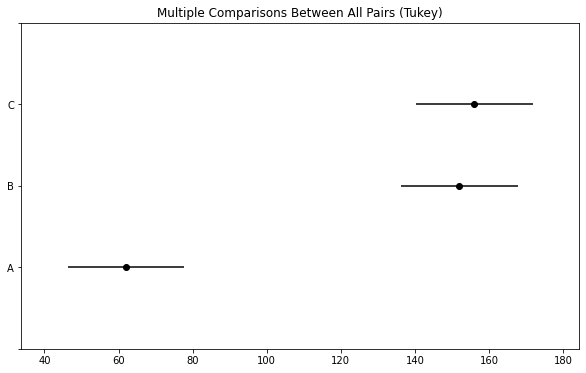

In [29]:
test.plot_simultaneous();